In [13]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
%pylab inline
import numpy as np
from sklearn.decomposition import PCA

Populating the interactive namespace from numpy and matplotlib


In [22]:
ds_test = pd.read_csv('/home/keratin/Documents/CBML/mnist_data/train.csv')

In [23]:
dim = [2,3,5,7,10,20,50,120,256,314,442]
acc = []

In [25]:
data = ds_test.values[:1000,1:]
labels = ds_test.values[:1000,0]
print labels.shape
print data.shape
data_std = (data-data.mean(axis=0))/(data.std(axis=0)+1e-03)

(1000,)
(1000, 784)


In [28]:
for ix in dim:
    pca = PCA(n_components=ix)
    X = pca.fit_transform(data_std)
    split = int(0.8*data_std.shape[0])
    X_train = X[:split,:]
    X_test = X[split:,:]
    y_train = labels[:split]
    y_test = labels[split:]
    
    rf = RandomForestClassifier(n_estimators=40,random_state=31)
    rf.fit(X_train,y_train)
    
    acc.append(rf.score(X_test, y_test))
print acc

[0.38500000000000001, 0.46999999999999997, 0.77000000000000002, 0.75, 0.81499999999999995, 0.87, 0.82499999999999996, 0.80000000000000004, 0.77000000000000002, 0.76500000000000001, 0.66500000000000004]


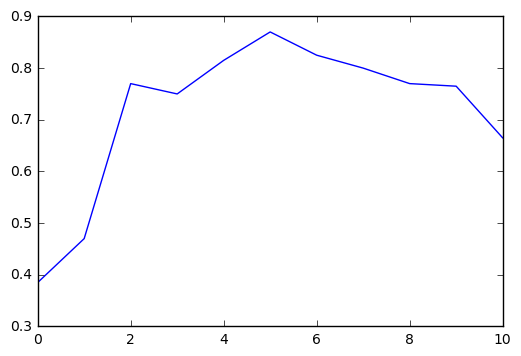

In [31]:
plt.plot(acc)
plt.show()